In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
import plotly.express as px

In [2]:
df = pd.read_csv('C:/Users/joker/Desktop/Hari-Projecs/sparks/SampleSuperstore.csv')

In [3]:
df.head()

Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

In [4]:
df.describe()

Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.858001     3.789574     0.156203    28.656896
std    32063.693350    623.245101     2.225110     0.206452   234.260108
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
correlation_matrix = df.corr()
correlation_matrix

Postal Code     Sales  Quantity  Discount    Profit
Postal Code     1.000000 -0.023854  0.012761  0.058443 -0.029961
Sales          -0.023854  1.000000  0.200795 -0.028190  0.479064
Quantity        0.012761  0.200795  1.000000  0.008623  0.066253
Discount        0.058443 -0.028190  0.008623  1.000000 -0.219487
Profit         -0.029961  0.479064  0.066253 -0.219487  1.000000

<AxesSubplot:>

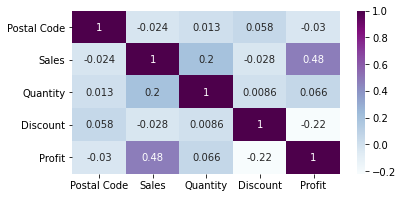

In [7]:
plt.figure(figsize=(6,3))
sns.heatmap(correlation_matrix, annot = True, cmap = 'BuPu')

# Product Categories

In [8]:
category = df['Category'].unique()
category

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [9]:
category_counts = df['Category'].value_counts()
category_counts

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

# Visualizing Categories

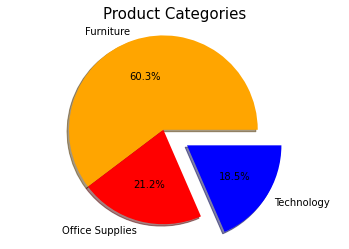

In [10]:
labels = category
explode = (0.0,0.0,0.3)
colors = ('orange', 'red', 'blue')
# Wedge Properties
wp = {'linewidth' : 1, 'edgecolor' : 'green'}
fig , ax1 = plt.subplots()
ax1.pie(category_counts ,labels = labels, autopct = '%1.1f%%', shadow = True, colors = colors, explode = explode)
ax1.axis('equal')
plt.title('Product Categories', fontsize = 15)
plt.show()

# Product Sub-Categories

In [11]:
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

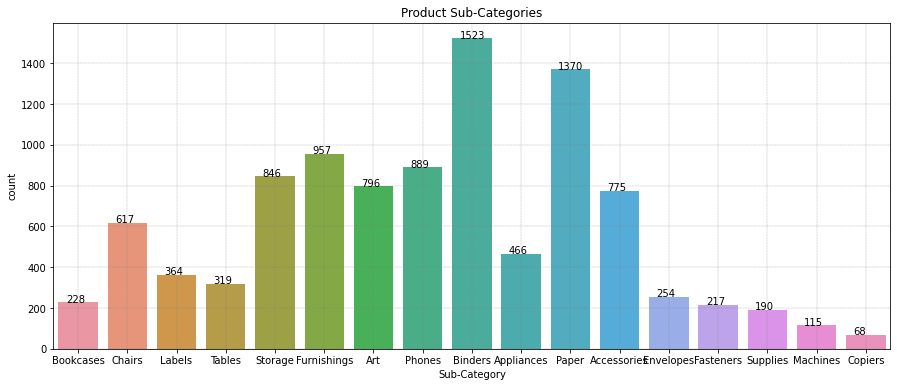

In [12]:
fig = plt.figure(figsize = (15,6))
axes = fig.add_subplot(111)
a = sns.countplot('Sub-Category', data = df)
for a in axes.patches: 
    axes.annotate('{:.0f}'.format(a.get_height()), (a.get_x()+0.15, a.get_height()+1))

plt.grid(color = 'gray', linestyle = '--', linewidth = 0.3)
plt.title('Product Sub-Categories', fontsize = 12)
plt.show()

# Profit by Category

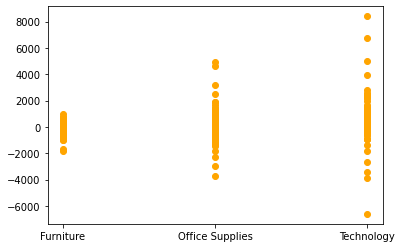

In [13]:
plt.scatter(x = 'Category', y = 'Profit', data = df, color = 'orange')

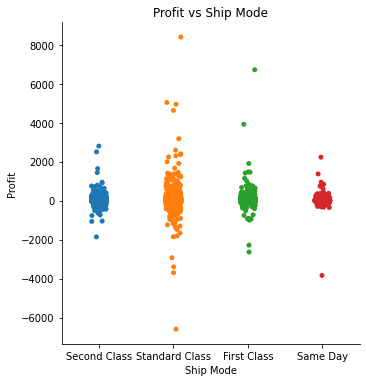

In [15]:
sns.catplot(x = 'Ship Mode', y = 'Profit', data = df)
plt.xlabel('Ship Mode')
plt.title('Profit vs Ship Mode')
plt.show()

In [16]:
ship_profit = df[['Ship Mode', 'Profit']]
ship_profit_grp = ship_profit.groupby('Ship Mode').Profit.sum()
s_p = ship_profit_grp.reset_index()
s_p

Ship Mode       Profit
0     First Class   48969.8399
1        Same Day   15891.7589
2    Second Class   57446.6354
3  Standard Class  164088.7875

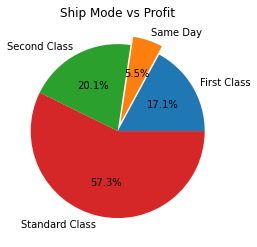

In [17]:
plt.pie(s_p['Profit'], labels = s_p['Ship Mode'], autopct = '%1.1f%%', explode = (0, 0.1,0,0))
plt.title('Ship Mode vs Profit')
plt.show()

# Region vs Profit

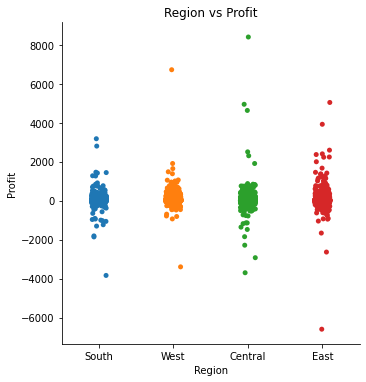

In [18]:
sns.catplot(x = 'Region', y = 'Profit', data = df)
plt.xlabel('Region')
plt.title('Region vs Profit')
plt.show()

In [20]:
region_profit = df[['Region', 'Profit']]
region_profit_grp = region_profit.groupby('Region').Profit.sum()
r_p = region_profit_grp.reset_index()
r_p

Region       Profit
0  Central   39706.3625
1     East   91522.7800
2    South   46749.4303
3     West  108418.4489

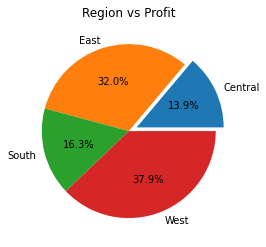

In [27]:
plt.pie(r_p['Profit'], labels = r_p['Region'], autopct = '%1.1f%%', explode = (0.1, 0,0,0))
plt.title('Region vs Profit')
plt.show()

# Segment vs Profit

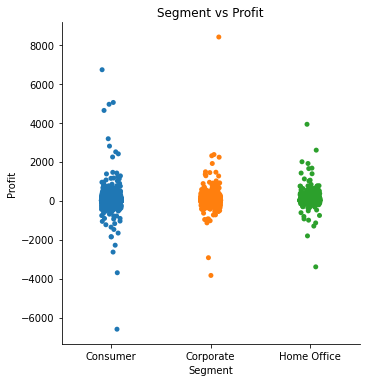

In [28]:
sns.catplot(x = 'Segment', y = 'Profit', data = df)
plt.xlabel('Segment')
plt.title('Segment vs Profit')
plt.show()

In [29]:
segment_profit = df[['Segment', 'Profit']]
segment_profit_grp = segment_profit.groupby('Segment').Profit.sum()
seg_p = segment_profit_grp.reset_index()
seg_p

Segment       Profit
0     Consumer  134119.2092
1    Corporate   91979.1340
2  Home Office   60298.6785

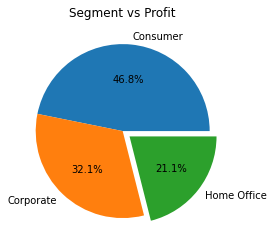

In [33]:
plt.pie(seg_p['Profit'], labels = seg_p['Segment'], autopct = '%1.1f%%', explode = ( 0,0,0.1))
plt.title('Segment vs Profit')
plt.show()

In [34]:
categories = df.groupby(['Category', 'Sub-Category']).Profit.sum()
categories_df = pd.DataFrame(categories)
categories_df

Profit
Category        Sub-Category            
Furniture       Bookcases     -3472.5560
                Chairs        26590.1663
                Furnishings   13059.1436
                Tables       -17725.4811
Office Supplies Appliances    18138.0054
                Art            6527.7870
                Binders       30221.7633
                Envelopes      6964.1767
                Fasteners       949.5182
                Labels         5546.2540
                Paper         34053.5693
                Storage       21278.8264
                Supplies      -1189.0995
Technology      Accessories   41936.6357
                Copiers       55617.8249
                Machines       3384.7569
                Phones        44515.7306

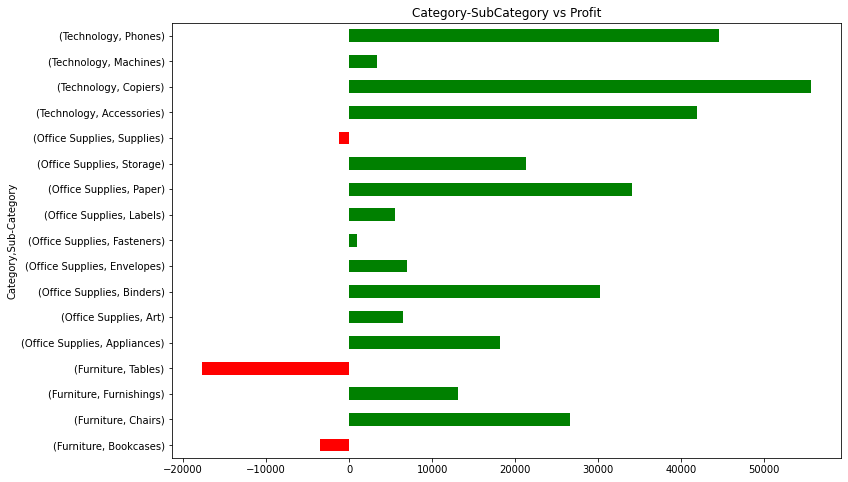

In [35]:
categories_df['positive'] = categories_df['Profit'] > 0
categories_df['Profit'].plot.barh(figsize = (12,8), color = categories_df.positive.map({True:'g', False:'r'}))
plt.title('Category-SubCategory vs Profit')
plt.show()